In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import emoji
import nltk
import spacy
from tqdm import tqdm
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('C:\\Users\\Saravanan\\OneDrive\\Desktop\\ipl\\chatgpt\\chatgpt_reviews.csv')

In [3]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,364189f4-3278-47bf-ada7-f5dfcefb4e58,Sadi Adine,Good,5,0,1.2024.192,2024-07-17 20:33:53,1.2024.192
1,45980304-a1cf-43ff-b06a-66fa8349bd15,Tim,best ever,5,0,1.2024.131,2024-07-17 20:33:46,1.2024.131
2,c30d38f9-70b9-4ed3-bdc5-d6e3b5aa6617,Sekh Kifaitulla,best 👌,5,0,1.2024.177,2024-07-17 20:33:38,1.2024.177
3,82a911d7-30f2-473e-b2d3-af8f881ecda0,Dương Đại Dương,nice,5,0,1.2024.177,2024-07-17 20:31:06,1.2024.177
4,6630eff1-04ee-4018-9525-ece8fe2a7a66,Christina Hector,App won't stop spinning. I'll go back to using...,1,0,1.2024.192,2024-07-17 20:29:22,1.2024.192
...,...,...,...,...,...,...,...,...
165479,462686ff-e500-413c-a6b4-2badc2e3b21d,m.santhosh Kumar,Update 2023,5,0,NaN,2023-07-27 16:26:31,NaN
165480,f10e0d48-ecb6-42db-b103-46c0046f9be9,Andrew Bourgeois,its grear,5,0,NaN,2023-09-23 16:25:18,NaN
165481,df909a49-90b5-4dac-9b89-c4bd5a7c2f75,Dern Bob,Funtastic App,5,0,NaN,2023-11-08 13:57:14,NaN
165482,abe43878-973f-4e96-a765-c4af5c7f7b20,Abdur rahman arif,hi all,5,0,NaN,2023-07-25 15:32:57,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165484 entries, 0 to 165483
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              165484 non-null  object
 1   userName              165483 non-null  object
 2   content               165478 non-null  object
 3   score                 165484 non-null  int64 
 4   thumbsUpCount         165484 non-null  int64 
 5   reviewCreatedVersion  152462 non-null  object
 6   at                    165484 non-null  object
 7   appVersion            152462 non-null  object
dtypes: int64(2), object(6)
memory usage: 10.1+ MB


In [5]:
df.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')

In [6]:
df.rename(columns={'reviewId': 'review_id',
                  'userName':'user_name',
                  'thumbsUpCount': 'thumbs_up_count',
                  'reviewCreatedVersion':'review_created_version',
                  'appVersion':'app_version'},inplace=True)

In [7]:
df.columns

Index(['review_id', 'user_name', 'content', 'score', 'thumbs_up_count',
       'review_created_version', 'at', 'app_version'],
      dtype='object')

In [8]:
df.isnull().sum()

review_id                     0
user_name                     1
content                       6
score                         0
thumbs_up_count               0
review_created_version    13022
at                            0
app_version               13022
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
165479    False
165480    False
165481    False
165482    False
165483    False
Length: 165484, dtype: bool

In [10]:
df = df.dropna()

In [11]:
df['score'].value_counts()

score
5    117271
4     18261
1      8154
3      6305
2      2466
Name: count, dtype: int64

In [12]:
df['thumbs_up_count'].value_counts()

thumbs_up_count
0      147474
1        2819
2         694
3         295
4         146
        ...  
250         1
730         1
400         1
163         1
93          1
Name: count, Length: 232, dtype: int64

Data Visualisation

Distribution of Review Scores

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\738084124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='viridis')


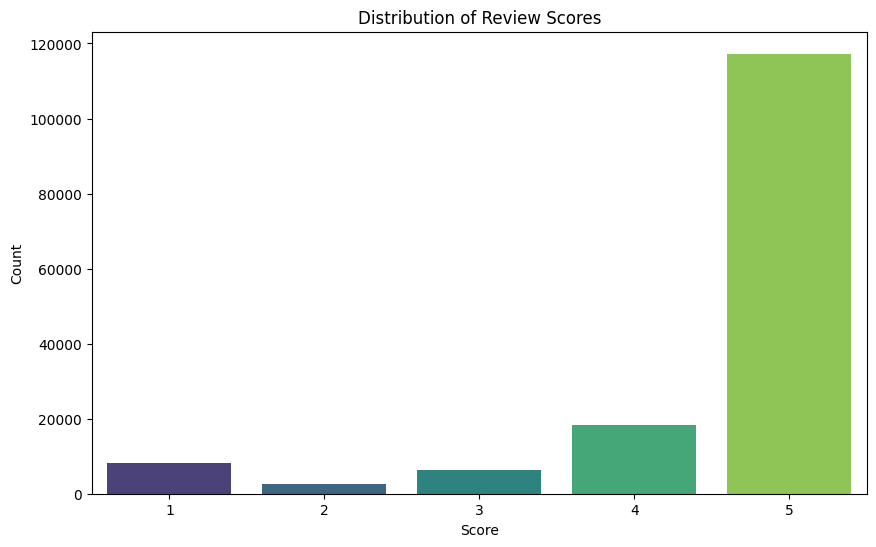

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='score', palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

Number of Reviews per App Version

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1979236717.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='app_version', palette='viridis', order=df_clean['app_version'].value_counts().index)


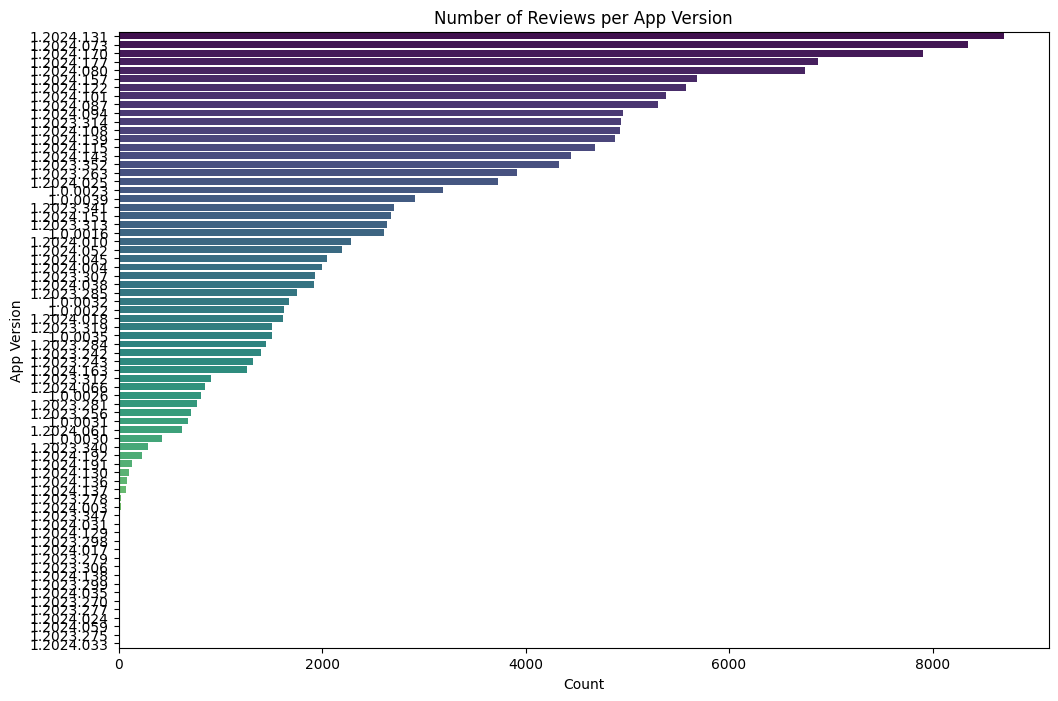

In [14]:
# Cleaning the data: Remove rows where 'appVersion' is NaN
df_clean = df.dropna(subset=['app_version'])

# Plotting the number of reviews per app version
plt.figure(figsize=(12, 8))
sns.countplot(data=df_clean, y='app_version', palette='viridis', order=df_clean['app_version'].value_counts().index)
plt.title('Number of Reviews per App Version')
plt.xlabel('Count')
plt.ylabel('App Version')
plt.show()


Reviews Over Time

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\3198182222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['at'] = pd.to_datetime(df['at'])
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\3198182222.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('at').resample('M').size().plot()


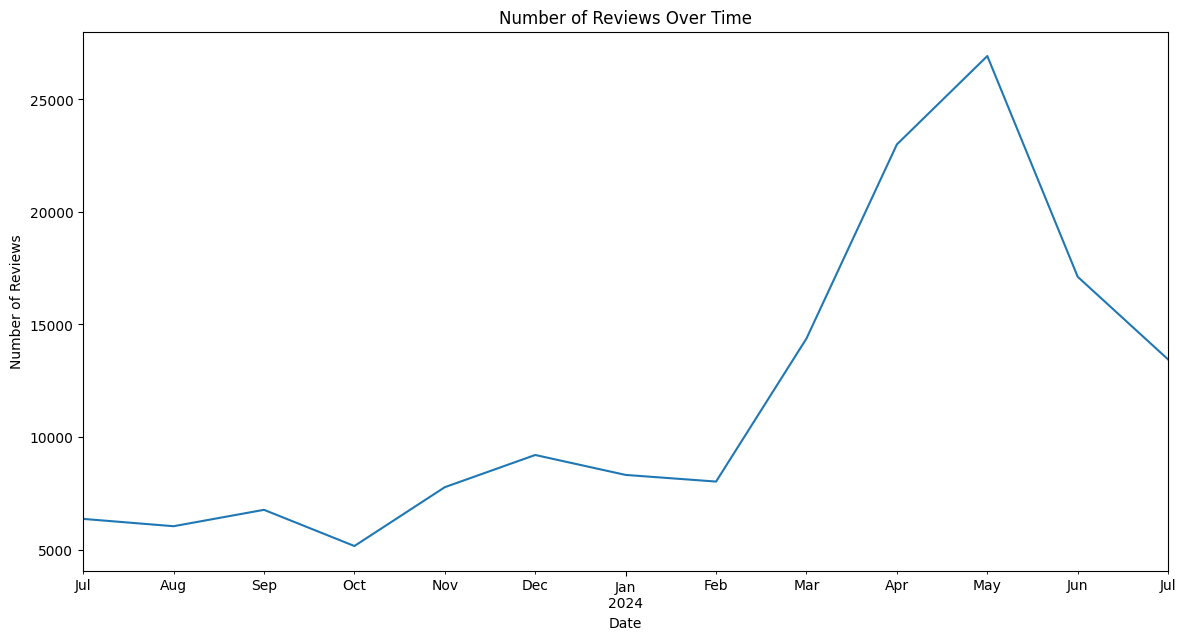

In [15]:
# Converting the 'at' column to datetime format
df['at'] = pd.to_datetime(df['at'])

# Plotting the number of reviews over time
plt.figure(figsize=(14, 7))
df.set_index('at').resample('M').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


Top Reviewers

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2802787737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reviewers.index, x=top_reviewers.values, palette='viridis')


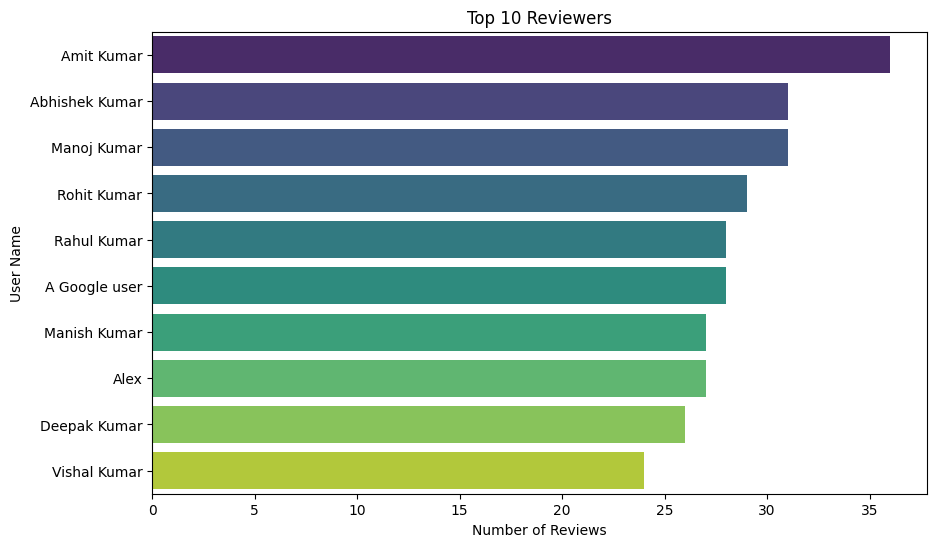

In [16]:
# Getting the top 10 reviewers by review count
top_reviewers = df['user_name'].value_counts().head(10)

# Plotting the top 10 reviewers
plt.figure(figsize=(10, 6))
sns.barplot(y=top_reviewers.index, x=top_reviewers.values, palette='viridis')
plt.title('Top 10 Reviewers')
plt.xlabel('Number of Reviews')
plt.ylabel('User Name')
plt.show()


Review Sentiment Analysis (if content is preprocessed)

In [25]:
df.columns

Index(['review_id', 'user_name', 'content', 'score', 'thumbs_up_count',
       'review_created_version', 'at', 'app_version'],
      dtype='object')

In [17]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to the 'content' column
df['sentiment'] = df['content'].apply(get_sentiment)


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\574393450.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['content'].apply(get_sentiment)


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\4119386899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


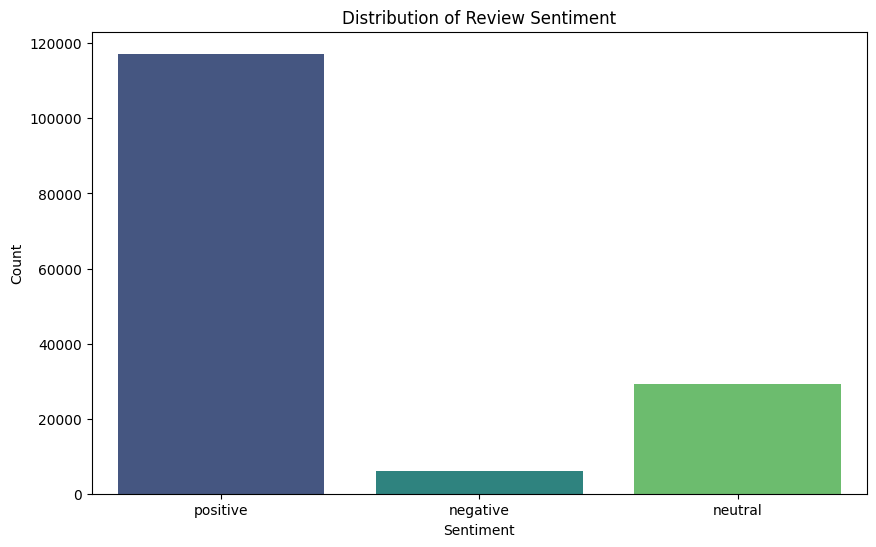

In [18]:
# Plotting the distribution of review sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Feature Engineering

In [29]:
df.columns

Index(['review_id', 'user_name', 'content', 'score', 'thumbs_up_count',
       'review_created_version', 'at', 'app_version', 'sentiment'],
      dtype='object')

In [19]:
df.drop(columns=['review_id','at','user_name'],inplace=True)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2891164678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['review_id','at','user_name'],inplace=True)


In [20]:
df.head()

,content,score,thumbs_up_count,review_created_version,app_version,sentiment
0,Good,5,0,1.2024.192,1.2024.192,positive
1,best ever,5,0,1.2024.131,1.2024.131,positive
2,best 👌,5,0,1.2024.177,1.2024.177,positive
3,nice,5,0,1.2024.177,1.2024.177,positive
4,App won't stop spinning. I'll go back to using...,1,0,1.2024.192,1.2024.192,negative


Encoding

In [23]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder

In [21]:
le=LabelEncoder()
df['review_created_version']=le.fit_transform(df['review_created_version'])

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\952899597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_created_version']=le.fit_transform(df['review_created_version'])


In [22]:
oe = OrdinalEncoder()
df['app_version'] = oe.fit_transform(df[['app_version']]) 

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\775066528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['app_version'] = oe.fit_transform(df[['app_version']])


In [23]:
df.head()

,content,score,thumbs_up_count,review_created_version,app_version,sentiment
0,Good,5,0,71,71.0,positive
1,best ever,5,0,59,59.0,positive
2,best 👌,5,0,69,69.0,positive
3,nice,5,0,69,69.0,positive
4,App won't stop spinning. I'll go back to using...,1,0,71,71.0,negative


Applying NLP to Analyze Content

In [24]:
df['content']

0                                                      Good
1                                                 best ever
2                                                    best 👌
3                                                      nice
4         App won't stop spinning. I'll go back to using...
                                ...                        
161956                                                   🕸️
161957                                       ❤️❤️❤️❤️❤️❤️❤️
161958                                               ❤️❤️❤️
161959                                               ❤️❤️❤️
161960                                        System.......
Name: content, Length: 152457, dtype: object

In [25]:
df['content'] = df['content'].str.lower()
df['content']

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1602159419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.lower()


0                                                      good
1                                                 best ever
2                                                    best 👌
3                                                      nice
4         app won't stop spinning. i'll go back to using...
                                ...                        
161956                                                   🕸️
161957                                       ❤️❤️❤️❤️❤️❤️❤️
161958                                               ❤️❤️❤️
161959                                               ❤️❤️❤️
161960                                        system.......
Name: content, Length: 152457, dtype: object

In [27]:
import re

In [26]:
def remove_html_tags(text):
    clean_text = re.sub('<.*>', '', text)
    return clean_text

df['content'] = df['content'].apply(remove_html_tags)
df['content'].head(20)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2185158574.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_html_tags)


0                                                  good
1                                             best ever
2                                                best 👌
3                                                  nice
4     app won't stop spinning. i'll go back to using...
5     still having network error on galaxy s22. can'...
6                             best easy fast convenient
7                                                  good
8     on a specific topic, the answer should be a li...
9     regional access restrictions. context gets del...
10    wow the app is useful especially during resear...
11                     thank you very much. very nice 👍
12                                                 nice
13    i constantly use the app chat gpt i love it be...
14    it's quite very good for learners of foreign l...
15                                            fantastic
16                                       excellent work
17    this is great! i've already used it for so

In [27]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    clean_text = re.sub(url_pattern, '', text)
    return clean_text

df['content'] = df['content'].apply(remove_urls)
df['content'].head(20)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2604903284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_urls)


0                                                  good
1                                             best ever
2                                                best 👌
3                                                  nice
4     app won't stop spinning. i'll go back to using...
5     still having network error on galaxy s22. can'...
6                             best easy fast convenient
7                                                  good
8     on a specific topic, the answer should be a li...
9     regional access restrictions. context gets del...
10    wow the app is useful especially during resear...
11                     thank you very much. very nice 👍
12                                                 nice
13    i constantly use the app chat gpt i love it be...
14    it's quite very good for learners of foreign l...
15                                            fantastic
16                                       excellent work
17    this is great! i've already used it for so

In [30]:
import string

In [28]:
def remove_punc(text):
    punc = string.punctuation
    clean_text = text.translate(str.maketrans('','', punc))
    return clean_text

df['content'] = df['content'].apply(remove_punc)
df['content'].head(20)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\4009605870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_punc)


0                                                  good
1                                             best ever
2                                                best 👌
3                                                  nice
4     app wont stop spinning ill go back to using th...
5     still having network error on galaxy s22 cant ...
6                             best easy fast convenient
7                                                  good
8     on a specific topic the answer should be a lit...
9     regional access restrictions context gets dele...
10    wow the app is useful especially during resear...
11                      thank you very much very nice 👍
12                                                 nice
13    i constantly use the app chat gpt i love it be...
14    its quite very good for learners of foreign la...
15                                            fantastic
16                                       excellent work
17    this is great ive already used it for so m

In [29]:
chat_words_mapping = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "btw": "by the way",
    "afk": "away from keyboard",
    "rofl": "rolling on the floor laughing",
    "ttyl": "talk to you later",
    "np": "no problem",
    "thx": "thanks",
    "omg": "oh my god",
    "idk": "I don't know",
    "np": "no problem",
    "gg": "good game",
    "g2g": "got to go",
    "b4": "before",
    "cu": "see you",
    "yw": "you're welcome",
    "wtf": "what the f*ck",
    "imho": "in my humble opinion",
    "jk": "just kidding",
    "gf": "girlfriend",
    "bf": "boyfriend",
    "u": "you",
    "r": "are",
    "2": "to",
    "4": "for",
    "b": "be",
    "c": "see",
    "y": "why",
    "tho": "though",
    "smh": "shaking my head",
    "lolz": "laughing out loud",
    "h8": "hate",
    "luv": "love",
    "pls": "please",
    "sry": "sorry",
    "tbh": "to be honest",
    "omw": "on my way",
    "omw2syg": "on my way to see your girlfriend",
}
def expand_chat_words(text):
    words = text.split()
    expanded_words = [chat_words_mapping.get(word.lower(), word) for word in words]
    return ' '.join(expanded_words)

df['content'] = df['content'].apply(expand_chat_words)
df['content'].head(20)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2838825527.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(expand_chat_words)


0                                                  good
1                                             best ever
2                                                best 👌
3                                                  nice
4     app wont stop spinning ill go back to using th...
5     still having network error on galaxy s22 cant ...
6                             best easy fast convenient
7                                                  good
8     on a specific topic the answer should be a lit...
9     regional access restrictions context gets dele...
10    wow the app is useful especially during resear...
11                      thank you very much very nice 👍
12                                                 nice
13    i constantly use the app chat gpt i love it be...
14    its quite very good for learners of foreign la...
15                                            fantastic
16                                       excellent work
17    this is great ive already used it for so m

In [35]:
import nltk

In [30]:
def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ''.join(filtered_tokens)
    return preprocessed_text

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def remove_stop_words(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)  # Ensure tokens are joined with a space
    return preprocessed_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saravanan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saravanan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
df['content'] = df['content'].apply(remove_stop_words)
df['content']

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1337170473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(remove_stop_words)


0                                                      good
1                                                 best ever
2                                                    best 👌
3                                                      nice
4         app wont stop spinning ill go back using websi...
                                ...                        
161956                                                   🕸️
161957                                       ❤️❤️❤️❤️❤️❤️❤️
161958                                               ❤️❤️❤️
161959                                               ❤️❤️❤️
161960                                               system
Name: content, Length: 152457, dtype: object

In [39]:
import emoji

In [33]:
def replace_emojis_with_meanings(text):
    def replace(match):
        emoji_char = match.group()
        emoji_meaning = emoji.demojize(emoji_char)
        return emoji_meaning

    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"
                            u"\U0001F300-\U0001F5FF"
                            u"\U0001F680-\U0001F6FF"
                            u"\U0001F1E0-\U0001F1FF"
                            u"\U00002500-\U00002BEF"
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                             u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"
                            u"\u3030"
                            "]+", flags=re.UNICODE)
    text_with_meanings = emoji_pattern.sub(replace, text)
    return text_with_meanings

In [34]:
df['content'] = df['content'].apply(replace_emojis_with_meanings)
df['content']

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1401226754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(replace_emojis_with_meanings)


0                                                      good
1                                                 best ever
2                                            best :OK_hand:
3                                                      nice
4         app wont stop spinning ill go back using websi...
                                ...                        
161956                                         :spider_web:
161957    :red_heart::red_heart::red_heart::red_heart::r...
161958                    :red_heart::red_heart::red_heart:
161959                    :red_heart::red_heart::red_heart:
161960                                               system
Name: content, Length: 152457, dtype: object

In [35]:
def word_tokenization(text):
    return nltk.word_tokenize(text)

In [36]:
df['token_content'] = df['content'].apply(word_tokenization)
df['token_content']

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2575566827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_content'] = df['content'].apply(word_tokenization)


0                                                    [good]
1                                              [best, ever]
2                                     [best, :, OK_hand, :]
3                                                    [nice]
4         [app, wont, stop, spinning, ill, go, back, usi...
                                ...                        
161956                                   [:, spider_web, :]
161957    [:, red_heart, :, :red_heart, :, :red_heart, :...
161958      [:, red_heart, :, :red_heart, :, :red_heart, :]
161959      [:, red_heart, :, :red_heart, :, :red_heart, :]
161960                                             [system]
Name: token_content, Length: 152457, dtype: object

In [37]:
import spacy
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['ner', 'textcat'])

# Define batch processing function
def batch_pos_tagging(texts):
    docs = list(nlp.pipe(texts, batch_size=50))
    return [[(token.text, token.pos_) for token in doc] for doc in docs]

# Batch size and number of batches
batch_size = 50
num_batches = len(df) // batch_size + 1

pos_tags = []
for i in tqdm(range(num_batches)):
    start = i * batch_size
    end = start + batch_size
    batch_texts = df['content'][start:end].tolist()
    pos_tags.extend(batch_pos_tagging(batch_texts))

# Ensure pos_tags is a list of lists with the correct length
assert len(pos_tags) == len(df)

# Assign POS tags to DataFrame
df['POS_Tags'] = pos_tags


100%|██████████| 3050/3050 [01:59<00:00, 25.57it/s]
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2388139022.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POS_Tags'] = pos_tags


In [38]:
df.rename(columns={'POS_Tags': 'pos_tags'}, inplace=True)

C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\2047501789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'POS_Tags': 'pos_tags'}, inplace=True)


In [39]:
df['pos_tags']

0                                             [(good, ADJ)]
1                                [(best, ADV), (ever, ADV)]
2         [(best, ADJ), (:, PUNCT), (OK_hand, X), (:, PU...
3                                             [(nice, ADJ)]
4         [(app, PROPN), (wo, AUX), (nt, PART), (stop, V...
                                ...                        
161956            [(:, PUNCT), (spider_web, X), (:, PUNCT)]
161957    [(:, PUNCT), (red_heart::red_heart::red_heart:...
161958    [(:, PUNCT), (red_heart::red_heart::red_heart,...
161959    [(:, PUNCT), (red_heart::red_heart::red_heart,...
161960                                     [(system, NOUN)]
Name: pos_tags, Length: 152457, dtype: object

Bag of Words

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Convert lists to strings
df['content'] = df['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['token_content'] = df['token_content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['pos_tags'] = df['pos_tags'].apply(lambda x: ' '.join(str(i) for i in x) if isinstance(x, list) else x)

# Vectorization
vectorizer = CountVectorizer(ngram_range=(2,2))

bow_c = vectorizer.fit_transform(df['content'])
bow_t = vectorizer.fit_transform(df['token_content'])
bow_p = vectorizer.fit_transform(df['pos_tags'])

# Dimensionality Reduction
svd = TruncatedSVD(n_components=100)

bow_c_reduced = svd.fit_transform(bow_c)
bow_t_reduced = svd.fit_transform(bow_t)
bow_p_reduced = svd.fit_transform(bow_p)

# Assign back to DataFrame
df['content'] = list(bow_c_reduced)
df['token_content'] = list(bow_t_reduced)
df['pos_tags'] = list(bow_p_reduced)


C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1087238637.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1087238637.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_content'] = df['token_content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
C:\Users\Saravanan\AppData\Local\Temp\ipykernel_3672\1087238637.py:9: SettingWithCopyWarni

In [41]:
df.head()

,content,score,thumbs_up_count,review_created_version,app_version,sentiment,token_content,pos_tags
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,71,71.0,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.20420197866666304, -0.1346301353336765, -0...."
1,"[0.00020620905987153766, 1.4084872715731689e-0...",5,0,59,59.0,positive,"[0.00020620906082779842, 1.4083873552465547e-0...","[0.042115534405089625, -0.02871689831781586, -..."
2,"[0.00011384917514094526, 1.0833044228510229e-1...",5,0,69,69.0,positive,"[0.00011384917513655443, 1.0825269670558331e-1...","[0.3047106551408867, -0.06787154760490824, 0.1..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5,0,69,69.0,positive,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05686495456506213, -0.035677074068273085, -..."
4,"[2.409024688179776e-06, 9.517256264846199e-10,...",1,0,71,71.0,negative,"[2.409024803508769e-06, 9.519170754730349e-10,...","[0.7857664762089926, -0.590836984888863, -0.80..."


Test Train Split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.drop(columns=['score'])
y = df['score']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 42)

Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier()


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Sample data
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.60      0.43      0.50        14

    accuracy                           0.40        20
   macro avg       0.40      0.38      0.38        20
weighted avg       0.48      0.40      0.42        20



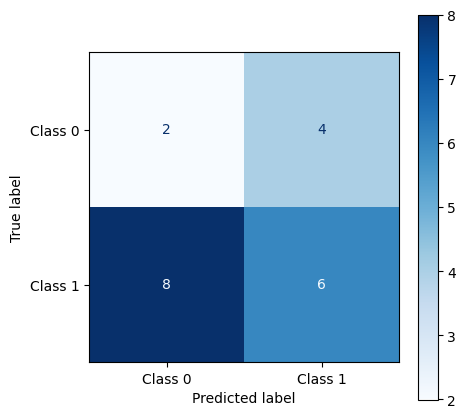

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example predictions
y_pred = dt.predict(X_test)

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

fig, ax = plt.subplots(figsize=(5, 5))
cm_display.plot(ax=ax, cmap='Blues', values_format='d')
plt.show()


Random Forest Classifier

In [49]:
rf = RandomForestClassifier()

In [50]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred = rf.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.60      0.43      0.50        14

    accuracy                           0.40        20
   macro avg       0.40      0.38      0.38        20
weighted avg       0.48      0.40      0.42        20



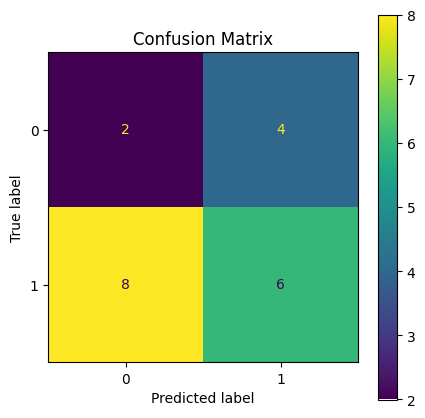

In [53]:
cm1 = confusion_matrix(y_test, y_pred)
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)

fig, ax = plt.subplots(figsize = (5,5))
cm1_display.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

Support Vector Machines

In [54]:
svm = SVC()

In [55]:
svm.fit(X_train, y_train)

SVC()

In [56]:
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.21      0.50      0.30         6
           1       0.50      0.21      0.30        14

    accuracy                           0.30        20
   macro avg       0.36      0.36      0.30        20
weighted avg       0.41      0.30      0.30        20



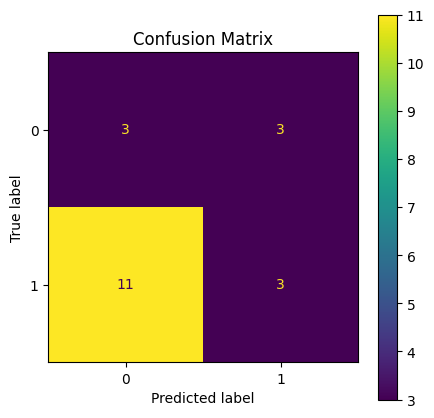

In [57]:
cm2 = confusion_matrix(y_test, y_pred)
cm2_display = ConfusionMatrixDisplay(confusion_matrix = cm2)

fig, ax = plt.subplots(figsize = (5,5))
cm2_display.plot(ax=ax)
plt.title('Confusion Matrix')
plt.show()

KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)

In [59]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.30      0.50      0.38         6
           1       0.70      0.50      0.58        14

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.58      0.50      0.52        20



GridSearchCV for KNN

In [61]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 25, 50, 75, 100]}

In [62]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

c:\Users\Saravanan\OneDrive\Desktop\ipl\chatgpt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Saravanan\OneDrive\Desktop\ipl\chatgpt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Saravanan\OneDrive\Desktop\ipl\chatgpt\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Saravanan\OneDrive\Desktop\ipl\chatgpt\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
     

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 12, 15, 25, 50, 75,
                                         100]},
             scoring='accuracy')

In [63]:
best_k = grid_search.best_params_['n_neighbors']
print("Best k Value:", best_k)

Best k Value: 1


In [64]:
knn1 = KNeighborsClassifier(n_neighbors=50)

In [65]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [66]:
y_pred1 = knn1.predict(X_test)

In [67]:
print(classification_report(y_test, y_pred1, zero_division=0))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         6
           1       0.62      0.36      0.45        14

    accuracy                           0.40        20
   macro avg       0.44      0.43      0.39        20
weighted avg       0.51      0.40      0.42        20



In [68]:
import joblib
import time

# Use a subset of data for quicker iteration
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Model training and evaluation
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=3)
}

best_model = None
best_accuracy = 0

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_sub, y_train_sub)
    y_pred = model.predict(X_test)
    accuracy = (y_pred == y_test).mean()
    print(f"{model_name} Accuracy: {accuracy:.4f}, Time Taken: {time.time() - start_time:.2f}s")
    
    joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model.pkl")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Save the best model with a clear name
joblib.dump(best_model, 'best_model.pkl')
print(f"The best model ({type(best_model).__name__}) was saved with an accuracy of {best_accuracy:.4f}")


Decision Tree Accuracy: 0.5000, Time Taken: 0.00s
Random Forest Accuracy: 0.5000, Time Taken: 0.28s
SVM Accuracy: 0.5000, Time Taken: 0.02s
KNN Accuracy: 0.3500, Time Taken: 0.02s
The best model (DecisionTreeClassifier) was saved with an accuracy of 0.5000


In [73]:
# Sample data for demonstration
training_texts = ["Good", "Excellent", "Poor", "Average"]  # Example review content
training_tokens = [["good"], ["excellent"], ["poor"], ["average"]]  # Example tokens
training_pos_tags = [["JJ"], ["JJ"], ["JJ"], ["JJ"]]  # Example POS tags
training_versions = ["1.2024.192", "1.2024.193"]  # Example review created versions
training_app_versions = ["1.2024.192", "1.2024.193"]  # Example app versions


In [75]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Create instances of the vectorizers and encoders
content_vectorizer = CountVectorizer()
token_content_vectorizer = CountVectorizer()
pos_tags_vectorizer = CountVectorizer()
review_created_version_encoder = LabelEncoder()
app_version_encoder = LabelEncoder()

# Fit these objects with your training data
content_vectorizer.fit(training_texts)
token_content_vectorizer.fit([' '.join(tokens) for tokens in training_tokens])
pos_tags_vectorizer.fit([' '.join(tags) for tags in training_pos_tags])
review_created_version_encoder.fit(training_versions)
app_version_encoder.fit(training_app_versions)

# Save the vectorizers and encoders to disk
joblib.dump(content_vectorizer, 'content_vectorizer.pkl')
joblib.dump(token_content_vectorizer, 'token_content_vectorizer.pkl')
joblib.dump(pos_tags_vectorizer, 'pos_tags_vectorizer.pkl')
joblib.dump(review_created_version_encoder, 'review_created_version_encoder.pkl')
joblib.dump(app_version_encoder, 'app_version_encoder.pkl')


['app_version_encoder.pkl']

In [76]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Sample training data
training_texts = ["Good", "Excellent", "Poor", "Average"]
training_tokens = [["good"], ["excellent"], ["poor"], ["average"]]
training_pos_tags = [["JJ"], ["JJ"], ["JJ"], ["JJ"]]
training_versions = ["1.2024.192", "1.2024.193"]
training_app_versions = ["1.2024.192", "1.2024.193"]

# Create and fit vectorizers and encoders
content_vectorizer = CountVectorizer()
token_content_vectorizer = CountVectorizer()
pos_tags_vectorizer = CountVectorizer()
review_created_version_encoder = LabelEncoder()
app_version_encoder = LabelEncoder()

content_vectorizer.fit(training_texts)
token_content_vectorizer.fit([' '.join(tokens) for tokens in training_tokens])
pos_tags_vectorizer.fit([' '.join(tags) for tags in training_pos_tags])
review_created_version_encoder.fit(training_versions)
app_version_encoder.fit(training_app_versions)

# Save them to disk
joblib.dump(content_vectorizer, 'content_vectorizer.pkl')
joblib.dump(token_content_vectorizer, 'token_content_vectorizer.pkl')
joblib.dump(pos_tags_vectorizer, 'pos_tags_vectorizer.pkl')
joblib.dump(review_created_version_encoder, 'review_created_version_encoder.pkl')
joblib.dump(app_version_encoder, 'app_version_encoder.pkl')


['app_version_encoder.pkl']

In [70]:
import joblib
from sklearn.tree import DecisionTreeClassifier

# Assuming X_train, y_train are your training data and labels
# Initialize and train the Decision Tree Classifier
best_model = DecisionTreeClassifier()
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model
loaded_model = joblib.load('best_model.pkl')

# Use the model to make predictions
predictions = loaded_model.predict(X_test)

# Analyze the predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.20      0.33      0.25         6
           1       0.60      0.43      0.50        14

    accuracy                           0.40        20
   macro avg       0.40      0.38      0.38        20
weighted avg       0.48      0.40      0.42        20



In [71]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

# Assuming you have these objects already created and fitted during your training process
# content_vectorizer, token_content_vectorizer, pos_tags_vectorizer, review_created_version_encoder, app_version_encoder

# Example of creating and fitting these objects (replace this with your actual fitting process)
content_vectorizer = CountVectorizer()
token_content_vectorizer = CountVectorizer()
pos_tags_vectorizer = CountVectorizer()
review_created_version_encoder = LabelEncoder()
app_version_encoder = LabelEncoder()

# Fit these objects with your training data
# For example:
# content_vectorizer.fit(training_texts)
# token_content_vectorizer.fit(training_tokens)
# pos_tags_vectorizer.fit(training_pos_tags)
# review_created_version_encoder.fit(training_versions)
# app_version_encoder.fit(training_app_versions)

# Save the vectorizers and encoders to disk
joblib.dump(content_vectorizer, 'content_vectorizer.pkl')
joblib.dump(token_content_vectorizer, 'token_content_vectorizer.pkl')
joblib.dump(pos_tags_vectorizer, 'pos_tags_vectorizer.pkl')
joblib.dump(review_created_version_encoder, 'review_created_version_encoder.pkl')
joblib.dump(app_version_encoder, 'app_version_encoder.pkl')

print("Vectorizers and encoders have been saved.")


Vectorizers and encoders have been saved.
